In [1]:
import requests
import os
import json
import postgreSQL_functions
import jinja2
from jinja2 import Environment, FileSystemLoader
from IPython.display import Image

In [2]:
# connecter au bas de donne postgresql
ma_base_donnees = "Floupics"
utilisateur = "postgres"
mot_passe = os.environ.get('pg_psw')

conn = postgreSQL_functions.ouvrir_connection(ma_base_donnees, utilisateur, mot_passe)

In [3]:
# cree la table movies
sql_creation_table_movies = """
    CREATE TABLE IF NOT EXISTS movies (
    movieId VARCHAR primary key,
    title VARCHAR,
    genres VARCHAR,
    year VARCHAR
    );
"""

postgreSQL_functions.creer_table(conn, sql_creation_table_movies)

La table a été crée avec succès


In [4]:
# cree la table rating
sql_creation_table_ratings = """
    CREATE TABLE IF NOT EXISTS ratings (
    Id serial primary key,
    Metascore VARCHAR,
    Awards VARCHAR,
    imdbVotes VARCHAR,
    imdbRating VARCHAR,
    movieId VARCHAR,
    FOREIGN KEY ( movieId) REFERENCES movies(movieId)
    );
"""

postgreSQL_functions.creer_table(conn, sql_creation_table_ratings)

La table a été crée avec succès


### Recupere les donnes des filmes apartir d'api

In [5]:
data= []
rating_data = []
for i in range(1000000,1000100):
    i= i+1
    q = 'tt'+str(i)
    response = requests.get('http://www.omdbapi.com/?i='+q+'&apikey=5f1e3ab&type=movie')
    #Creating a Python Dictionary
    response_info = json.loads(response.text)
    if response_info['Response'] != 'False':
        data.append([response_info['imdbID'], response_info['Title'], response_info['Year'], response_info['Genre']])
        rating_data.append([response_info['Metascore'], response_info['Awards'],  response_info['imdbVotes'], response_info['imdbRating'], response_info['imdbID'] ])


### Inserer les donnes dans la table movies

In [6]:
sql_inserer_movies_dict = """
    INSERT INTO movies 
    (movieId, title, year, genres)
    VALUES (%s, %s, %s, %s);
"""

postgreSQL_functions.inserer_donnees(conn, sql_inserer_movies_dict, data)


Les données ont été insérées avec succès


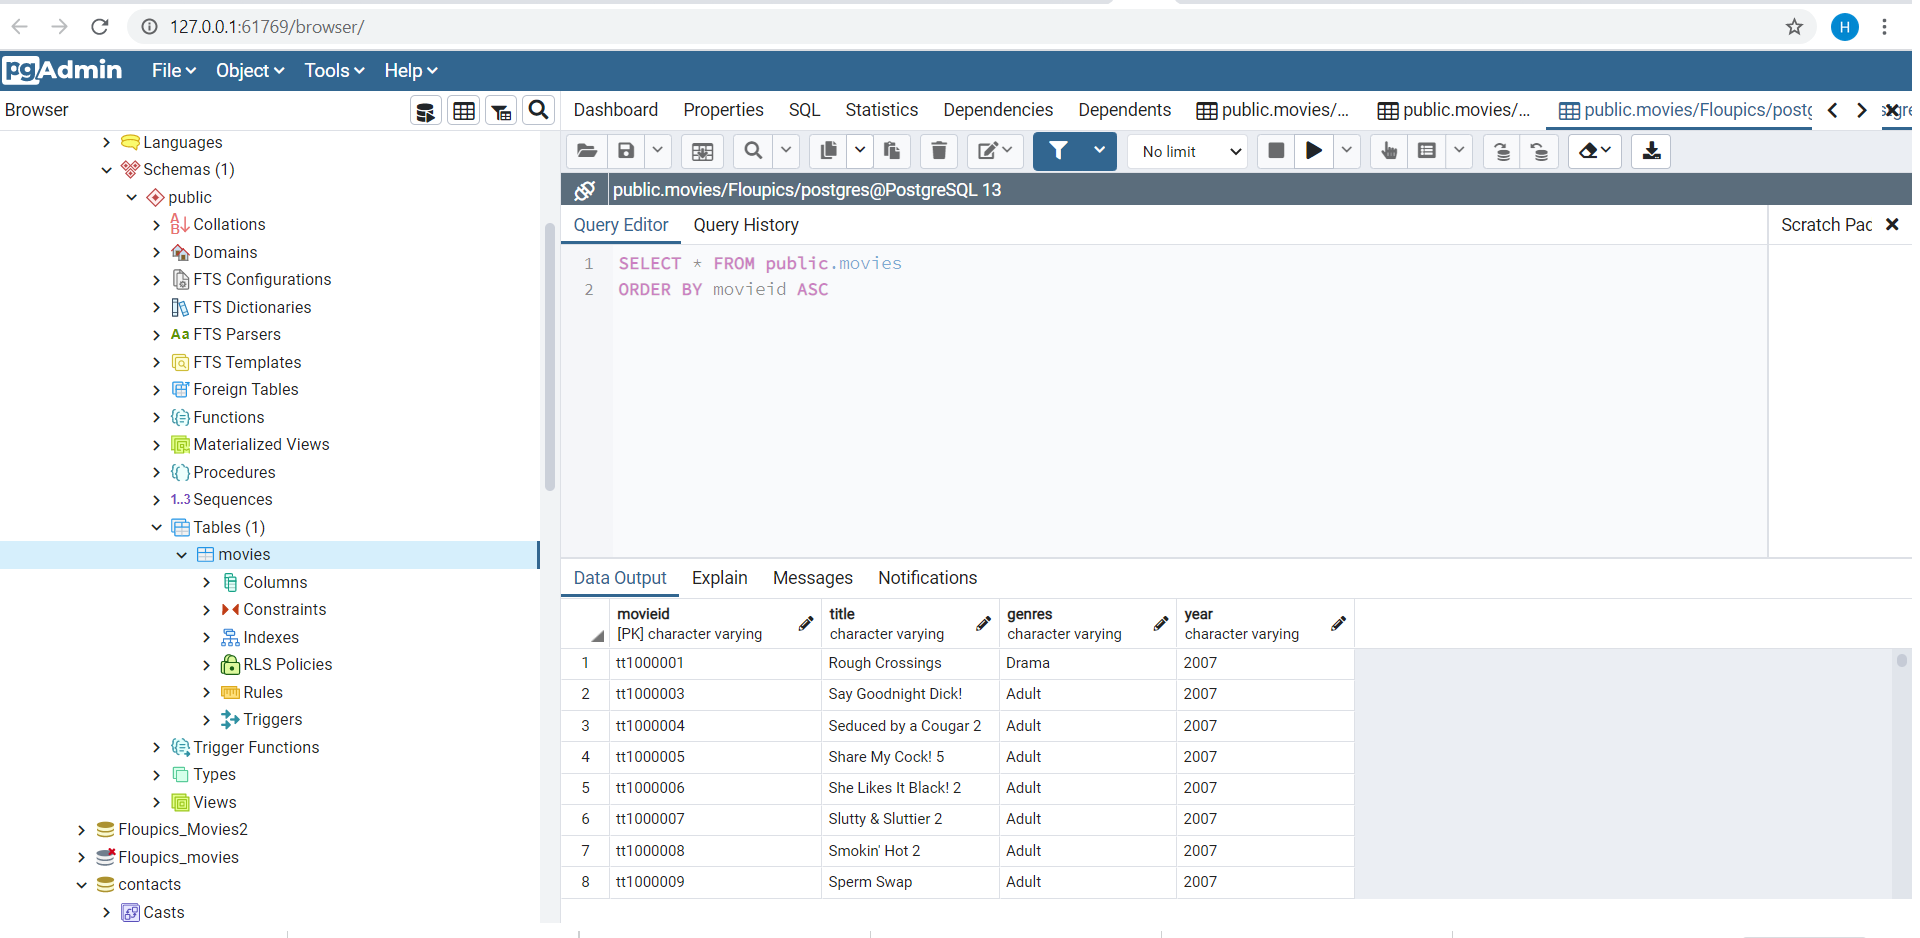

In [7]:
Image("snaps/movie.png")

### Inserer les donnes dans la table ratings

In [8]:
sql_inserer_ratings = """
    INSERT INTO ratings 
    (Metascore, Awards, imdbVotes, imdbRating, movieId)
    VALUES (%s, %s, %s, %s, %s);
"""

postgreSQL_functions.inserer_donnees(conn, sql_inserer_ratings, rating_data)

Les données ont été insérées avec succès


#### Afficher avec Python et le langage de template JINJA2 les données de la BDD PostGreSQL sur index.html

In [9]:
sql_requete = """select * from movies"""

In [10]:
movies = postgreSQL_functions.lire_donnees(conn, sql_requete)

Les données ont été lues avec succès


In [11]:
file_loader = FileSystemLoader('templates')
env = Environment(loader=file_loader)

template = env.get_template('index.html')
output = template.render(movies=movies)



 

In [12]:
with open("templates/index.html","w") as f:
    f.write(output)

In [13]:
print(output)

  
  ('tt1000001', 'Rough Crossings', 'Drama', '2007')
  ('tt1000003', 'Say Goodnight Dick!', 'Adult', '2007')
  ('tt1000004', 'Seduced by a Cougar 2', 'Adult', '2007')
  ('tt1000005', 'Share My Cock! 5', 'Adult', '2007')
  ('tt1000001', 'Rough Crossings', 'Drama', '2007')
  ('tt1000003', 'Say Goodnight Dick!', 'Adult', '2007')
  ('tt1000004', 'Seduced by a Cougar 2', 'Adult', '2007')
  ('tt1000005', 'Share My Cock! 5', 'Adult', '2007')
  ('tt1000001', 'Rough Crossings', 'Drama', '2007')
  ('tt1000003', 'Say Goodnight Dick!', 'Adult', '2007')
  ('tt1000004', 'Seduced by a Cougar 2', 'Adult', '2007')
  ('tt1000005', 'Share My Cock! 5', 'Adult', '2007')
  ('tt1000001', 'Rough Crossings', 'Drama', '2007')
  ('tt1000003', 'Say Goodnight Dick!', 'Adult', '2007')
  ('tt1000004', 'Seduced by a Cougar 2', 'Adult', '2007')
  ('tt1000005', 'Share My Cock! 5', 'Adult', '2007')
  ('tt1000001', 'Rough Crossings', 'Drama', '2007')
  ('tt1000003', 'Say Goodnight Dick!', 'Adult', '2007')
  ('tt1000004